In [151]:
import numpy as np
import pandas as pd
from scipy.sparse import csgraph

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [172]:
def get_A(positions):
    n = len(positions)
    A = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if not i == j:
                dist = np.linalg.norm(positions[j, 0:1] - positions[i, 0:1])
                A[i, j] = dist
    return A

def get_L(A):
    return csgraph.laplacian(A, normed=False)

def init_flock(n):
    positions = np.random.uniform(0, 100, (n, 2))
    v = np.random.rand(n).flatten()
    return positions, v

positions, v = init_flock(10)
A = get_A(positions)
L = get_L(A)

print(positions.shape)
print(A.shape)
print(L.shape)
print(v.shape)



(10, 2)
(10, 10)
(10, 10)
(10,)


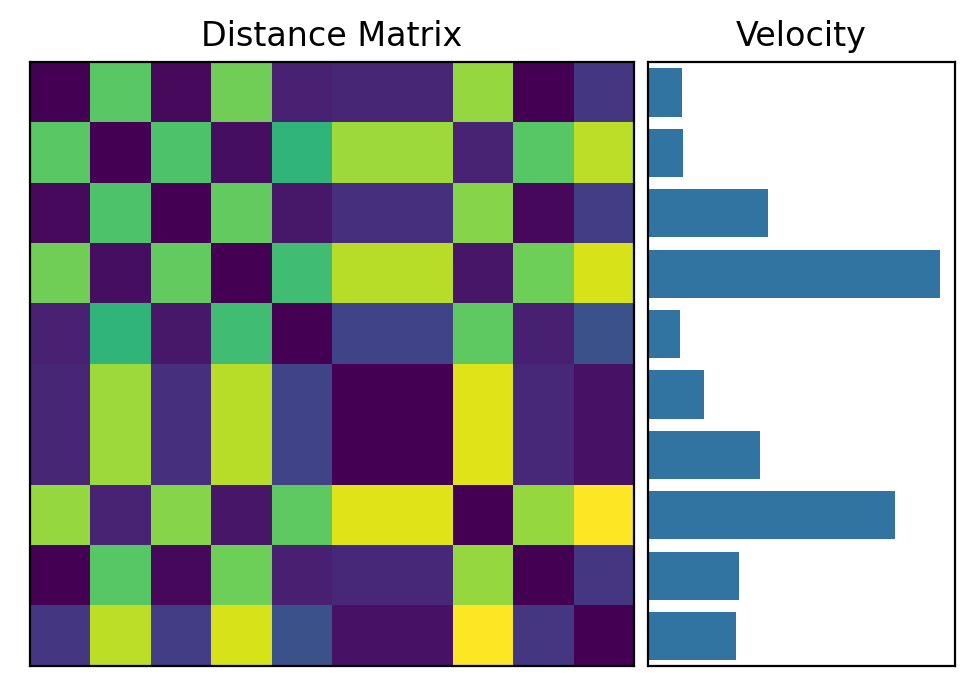

In [173]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(1, 2, 
                        sharey=True, 
                        gridspec_kw={'width_ratios': [2, 1]})
fig.patch.set_facecolor('white')


axs[0].imshow(A)
axs[0].set_xticks([])

axs[0].set_title("Distance Matrix")

b = sns.barplot(x=v, 
            y=list(range((len(v)))),
            ax=axs[1],
            orient='h',
            color='C0')

axs[1].set_title("Velocity")
axs[1].set_yticks([])
axs[1].set_xticks([])

plt.subplots_adjust(wspace=0.02)


In [174]:
def update_position(n, positions, v):
    # assumes we only care about movement forward in one direction (x, axis)
    for i in range(n):
        positions[i, 0] += v[i]
    return positions

def update_velocity(n, positions, v):
    new_vel = np.dot(np.eye(n) - get_L(get_A(positions)), v)
    return new_vel

def run_simulation(n_steps, positions_init, v_init):
    
    results = []
    
    n = len(positions_init)
    
    pos = positions_init
    v = v_init
    
    for t in range(n_steps):
        new_vel = update_velocity(n, pos, v) 
        new_pos = update_position(n, pos, v)
        
        result_row = {
            'mean_dist' : np.mean(get_A(new_pos)),
            'mean_vel' : np.mean(new_vel)
        }
        
        results.append(result_row)
        
        v = new_vel
        pos = new_pos
        
    results = pd.DataFrame(results)
    return results
        
        
    
positions, v = init_flock(10)
run_simulation(10, positions, v)

,mean_dist,mean_vel
0,2.586882e+01,6.993324e-01
1,1.023047e+02,6.993324e-01
2,2.741989e+04,6.993324e-01
3,5.166551e+07,6.992188e-01
4,2.726156e+13,2.516582e+06
5,2.828016e+22,-4.722366e+20
6,1.602017e+37,2.854495e+44
7,9.943487e+60,-4.856672e+82
8,3.738928e+99,0.000000e+00
9,inf,-6.991920e+245
